amplitude = 1.8871352716090195


<Figure size 1280x320 with 0 Axes>

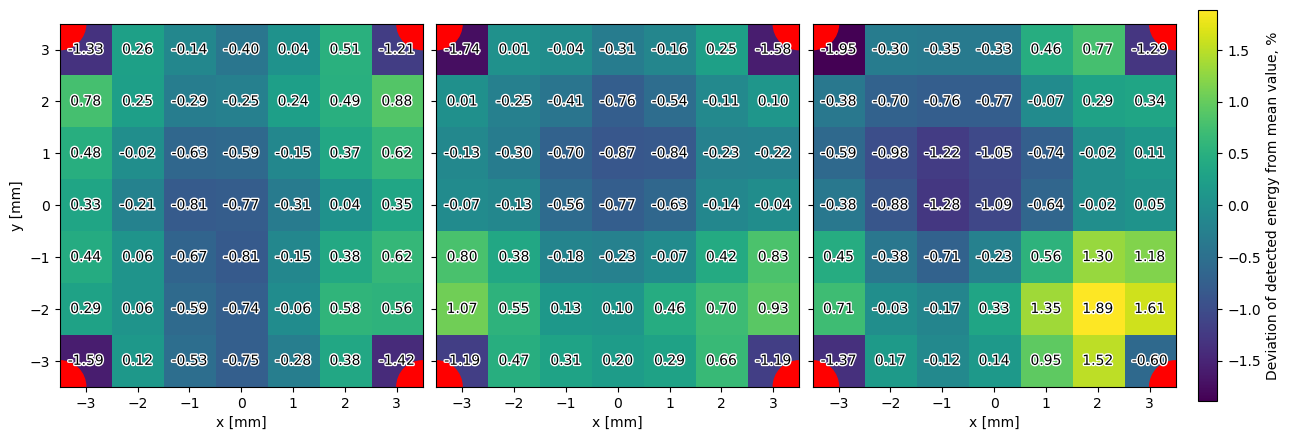

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.colors as colors
import matplotlib.patheffects as path_effects

map1 = np.loadtxt("for_publication_efficiency_MAPCorner0_25GeV.txt")
map2 = np.loadtxt("for_publication_efficiency_MAPCorner1_25GeV.txt")
map3 = np.loadtxt("for_publication_efficiency_MAPCorner2_25GeV.txt")

maps = [map1, map2, map3]

plt.figure(figsize=( 6.4*2, 4.8*(2/3) ) )


nonCornerSelect = np.array([
    [0, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 0]
], dtype=bool)

amplitude = 0

for i, mesh in enumerate(maps):

    mesh /= np.mean(mesh[nonCornerSelect])

    mesh[:,:] = (mesh[:,:]-1)*100 # to work as with mutable

    if np.max(np.abs(mesh[nonCornerSelect])) > amplitude: 
        
        amplitude = np.max(np.abs(mesh[nonCornerSelect]))

print("amplitude =", amplitude)

fig, axes = plt.subplots(1,3, figsize=(6.4*2, 6.4*(2/3)), constrained_layout=True, sharey='row')


for map_number in range(len(maps)):

    map_transposed = np.transpose(maps[map_number])[::-1,:]

    im = axes[map_number].imshow(map_transposed, vmin = -amplitude, vmax = amplitude, extent=(-3.5, 3.5, -3.5, 3.5))

    for (j,i),label in np.ndenumerate(map_transposed):
        
        if label == np.inf:
            continue

        text = axes[map_number].text(i-3,3-j,"{:.2f}".format(label),ha='center',va='center')

        text.set_path_effects([
                                  path_effects.Stroke(linewidth=2, foreground='white'),  # Shadow (outline)
                                  path_effects.Normal()  # Normal text on top
                               ])

    circle1 = plt.Circle(( 3.5,  3.5), 0.5, color='r')
    circle2 = plt.Circle(( 3.5, -3.5), 0.5, color='r')
    circle3 = plt.Circle((-3.5,  3.5), 0.5, color='r')
    circle4 = plt.Circle((-3.5, -3.5), 0.5, color='r')

    axes[map_number].add_patch(circle1)
    axes[map_number].add_patch(circle2)
    axes[map_number].add_patch(circle3)
    axes[map_number].add_patch(circle4)

axes[0].set_ylabel("y [mm]")

axes[0].set_xlabel("x [mm]")
axes[1].set_xlabel("x [mm]")
axes[2].set_xlabel("x [mm]")

colorbar = fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.05, pad=0.02)
colorbar.set_label("Deviation of detected energy from mean value, %")